In [1]:
import pandas as pd
import numpy as np

In [2]:
global_temp = pd.read_csv("GlobalTemperatures.csv")
print(global_temp.shape)
print(global_temp.columns)
print(global_temp.info())
print(global_temp.isnull().sum())

(3192, 9)
Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   

In [3]:
global_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [4]:
def wrangle(df):
    df = df.copy()
    df = df.drop(columns=["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty",
                          "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"], axis=1)
    def converttemp(x):
        x = (x * 1.8) + 32
        return float(x)
    df["LandAverageTemperature"] = df["LandAverageTemperature"].apply(converttemp)
    df["LandMaxTemperature"] = df["LandMaxTemperature"].apply(converttemp)
    df["LandMinTemperature"] = df["LandMinTemperature"].apply(converttemp)
    df["LandAndOceanAverageTemperature"] = df["LandAndOceanAverageTemperature"].apply(converttemp)
    df["dt"] = pd.to_datetime(df["dt"])
    df["Month"] = df["dt"].dt.month
    df["Year"] = df["dt"].dt.year
    df = df.drop("dt", axis=1)
    df = df.drop("Month", axis=1)
    #df = df[df.Year == 1850]
    df = df.set_index(["Year"])
    df = df.dropna()
    return df

In [5]:
global_temp = wrangle(global_temp)
print(global_temp.head())

      LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
Year                                                                   
1850                 33.3482             46.8356             26.2292   
1850                 37.5278             49.9460             27.8762   
1850                 40.9172             50.6246             28.5710   
1850                 44.9906             55.2812             33.8324   
1850                 50.0072             60.1790             38.8598   

      LandAndOceanAverageTemperature  
Year                                  
1850                         55.0994  
1850                         56.4584  
1850                         57.2774  
1850                         58.4006  
1850                         59.9126  


In [6]:
global_temp.head(50)

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
Year,,,,
1850,33.3482,46.8356,26.2292,55.0994
1850,37.5278,49.9460,27.8762,56.4584
1850,40.9172,50.6246,28.5710,57.2774
1850,44.9906,55.2812,33.8324,58.4006
1850,50.0072,60.1790,38.8598,59.9126
1850,55.6700,66.1028,44.7908,61.4354
1850,58.0856,66.6194,46.4252,62.2094
1850,57.2702,65.2586,45.3308,62.0924
1850,52.7090,60.5228,40.1594,60.5948


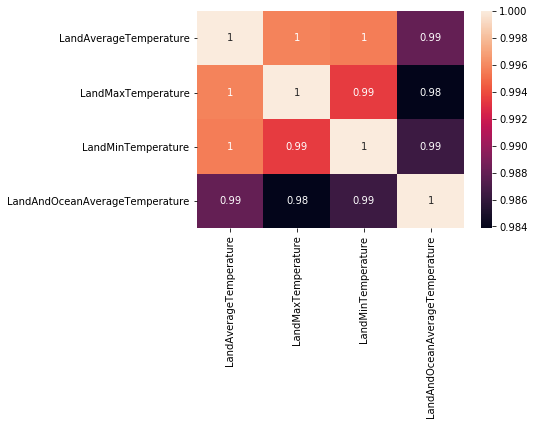

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = global_temp.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
target = "LandAndOceanAverageTemperature"
y = global_temp[target]
x = global_temp[["LandAverageTemperature", "LandMaxTemperature", "LandMinTemperature"]]

In [9]:
x

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature
Year,,,
1850,33.3482,46.8356,26.2292
1850,37.5278,49.9460,27.8762
1850,40.9172,50.6246,28.5710
1850,44.9906,55.2812,33.8324
1850,50.0072,60.1790,38.8598
...,...,...,...
2015,58.5590,69.2582,48.2090
2015,55.3982,65.9210,44.9582
2015,51.4418,61.6100,41.4176


In [10]:
y

Year
1850    55.0994
1850    56.4584
1850    57.2774
1850    58.4006
1850    59.9126
         ...   
2015    63.6602
2015    62.6882
2015    61.3220
2015    59.4536
2015    58.5932
Name: LandAndOceanAverageTemperature, Length: 1992, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.25, random_state=42)
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(1494, 3)
(498, 3)
(1494,)
(498,)


In [12]:
ytrain=ytrain[:,np.newaxis]
yval=yval[:,np.newaxis]

In [13]:
print(ytrain.shape)
print(yval.shape)

(1494, 1)
(498, 1)


In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
forest = make_pipeline(
    SelectKBest(k="all"),
    StandardScaler(),
    RandomForestRegressor(
        n_estimators=100,
        max_depth=50,
        random_state=77,
        n_jobs=-1
    )
)
forest.fit(xtrain, ytrain)

C:\Users\ritvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ritvi\anaconda3\lib\site-packages\sklearn\pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k='all',
                             score_func=<function f_classif at 0x000001E208559B88>)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=50,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_s

In [15]:
y_pred2 = forest.predict(xval)

In [16]:
y_pred2.shape

(498,)

In [17]:
y_pred2=y_pred2[:,np.newaxis]
y_pred2.shape

(498, 1)

In [18]:
import numpy as np
errors = abs(y_pred2 - yval)


In [19]:
errors

array([[0.284994],
       [0.154728],
       [0.4869  ],
       [0.554796],
       [0.117396],
       [0.070992],
       [0.113994],
       [0.212616],
       [0.837396],
       [0.41175 ],
       [0.66231 ],
       [0.19818 ],
       [0.290142],
       [0.122454],
       [0.104922],
       [0.332946],
       [0.090612],
       [0.089892],
       [0.04248 ],
       [0.349416],
       [0.003672],
       [0.276336],
       [0.849762],
       [0.658584],
       [0.272736],
       [0.020736],
       [0.07623 ],
       [0.201348],
       [0.678978],
       [0.090378],
       [0.720954],
       [0.008586],
       [0.12105 ],
       [0.538488],
       [0.889722],
       [0.234684],
       [0.165204],
       [0.030024],
       [0.640422],
       [0.268182],
       [0.00684 ],
       [0.65007 ],
       [0.0252  ],
       [0.13167 ],
       [0.245412],
       [0.343494],
       [0.154908],
       [0.076392],
       [0.159012],
       [0.155664],
       [0.012708],
       [0.13986 ],
       [0.19

In [20]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(yval, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(yval, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yval, y_pred2)))

Mean Absolute Error: 0.24421532530120257
Mean Squared Error: 0.10147965420317986
Root Mean Squared Error: 0.3185587139024451


In [21]:
forest.score(xval, yval) #accuracy

0.9802669209749004